In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

## Problem Size

In [2]:
npart = {
    'ref11': [2055401, 2069800, 16953492, 0, 14399, 0],
    'ref12': [16164334, 16246272, 17481626, 0, 82000, 0],
    'ref13': [128159051, 128729984, 19465190, 0, 577651, 0],
}
npart_total = {k: sum(v) for k, v in npart.items()}
print('Total particle number:', list(npart_total.values()))
npart_hydro = {k: v[0] for k, v in npart.items()}
print('Hydro particle number:', list(npart_hydro.values()))
hydro_fraction = {k: npart_hydro[k] / npart_total[k] for k in npart.keys()}
print('Hydro particle fraction:', [round(v, 2) for v in hydro_fraction.values()])

Total particle number: [21093092, 49974232, 276931876]
Hydro particle number: [2055401, 16164334, 128159051]
Hydro particle fraction: [0.1, 0.32, 0.46]


## Results

In [3]:
for problem_size in ['ref11', 'ref12', 'ref13']:
    print()
    print(problem_size, npart_hydro[problem_size])
    print(pd.read_csv(f'../../data/benchmark/{problem_size}.csv'))


ref11 2055401
        run  nodes  threads  cpus  wall_time_h  cpu_time_h
0   n002_t1      2        1    56         0.56       31.08
1   n002_t2      2        2    56         1.04       58.47
2   n002_t4      2        4    56         1.07       59.97
3   n004_t1      4        1   112         0.49       55.00
4   n004_t2      4        2   112         0.38       43.09
5   n004_t4      4        4   112         0.95      105.93
6   n008_t1      8        1   224         0.31       68.38
7   n008_t2      8        2   224         0.31       68.44
8   n008_t4      8        4   224         0.70      156.80
9   n016_t1     16        1   448         0.46      205.33
10  n016_t2     16        2   448         0.30      135.02
11  n016_t4     16        4   448         0.34      153.32
12  n032_t1     32        1   896         0.61      548.05
13  n032_t2     32        2   896         0.35      314.10
14  n032_t4     32        4   896         0.43      384.53
15  n064_t1     64        1  1792        

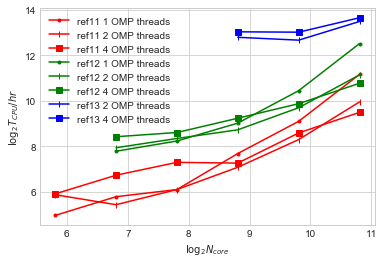

In [4]:
for ps, c in [('ref11', 'r'), ('ref12', 'g'), ('ref13', 'b')]:
    df = pd.read_csv(f'../../data/benchmark/{ps}.csv')
    for threads, marker in [(1, '.'), (2, '|'), (4, 's')]:
        dft = df[df.threads == threads]
        if dft.size > 0:
            plt.plot(np.log2(dft.cpus), np.log2(dft.cpu_time_h), marker=marker, c=c,
                     label=f'{ps} {threads} OMP threads')
plt.legend()
plt.xlabel('$\log_2{N_{core}}$')
plt.ylabel('$\log_2{T_{CPU}/hr}$')
plt.show()

In [5]:
from matplotlib.ticker import NullFormatter

def clear_tick_label(axis):
    axis.set_major_formatter(NullFormatter())
    axis.set_minor_formatter(NullFormatter())

def plot(ps):
    ax1 = plt.gca()
    ax2 = plt.twiny()
    ax1.set_zorder(ax2.get_zorder()+1) 
    
    df = pd.read_csv(f'../../data/benchmark/{ps}.csv')
    for threads, marker in [(1, '.'), (2, '|'), (4, 's')]:
        dft = df[df.threads == threads]
        if dft.size > 0:
            ax1.semilogx(dft.cpus, dft.cpu_time_h, marker=marker, c='k',     
                         label=f'{ps} {threads} OMP threads')
    ax1.legend()
    ax1.set_ylabel('CPU time [hr]')
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xscale('log')
    
    clear_tick_label(ax1.xaxis)
    ax1.set_xlabel('Core number')
    ax1.set_xticks(dft.cpus)
    ax1.set_xticklabels(dft.cpus)
    
    clear_tick_label(ax2.xaxis)
    ax2.set_xlabel('Node number')
    ax2.set_xticks(dft.cpus)
    ax2.set_xticklabels(dft.nodes)

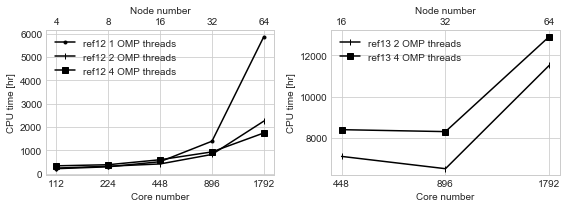

In [6]:
plt.figure(figsize=(8, 3))
plt.subplot(121)
plot('ref12')
plt.subplot(122)
plot('ref13')
plt.tight_layout()
plt.savefig('scaling.pdf')